In [1]:
# For now Copy and paste the information from the api_keys and run the kernel, then remove them 

In [41]:
# Import Dependenices
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import requests
import numpy as np
import random
%matplotlib notebook

In [19]:
# Read csv file for first person
first_person = pd.read_csv("Resources/Umb_League_19_20.csv")
first_person_df = pd.DataFrame(first_person)
first_person_df.sort_values(by = "Champion")

,Level Reached,Champion,Map,Kills,Deaths,Assists,Minions,Money Earned,Date Played
272,14,Aatrox,Howling Abyss,8,10,7,29,10.0k,6/8/2020
211,18,Aatrox,Howling Abyss,8,17,20,15,12.6k,7/11/2020
202,14,Ahri,Howling Abyss,2,11,21,21,8.0k,7/12/2020
799,18,Ahri,Howling Abyss,5,8,40,30,13.8k,6/7/2019
171,12,Ahri,Nexus Blitz,7,3,17,16,8.7k,7/23/2020
...,...,...,...,...,...,...,...,...,...
570,15,Zyra,Howling Abyss,7,11,29,35,12.2k,1/23/2020
137,16,Zyra,Howling Abyss,6,10,19,71,11.2k,8/1/2020
639,18,Zyra,Howling Abyss,1,12,19,91,16.6k,10/18/2019
196,18,Zyra,Howling Abyss,8,11,28,65,14.4k,7/17/2020


In [20]:
# Read csv file for second person
second_person = pd.read_csv("Resources/Rob_League_19_20.csv")
second_person_df = pd.DataFrame(second_person)
second_person.sort_values(by = "Champion")

,Level Reached,Champion,Map,Kills,Deaths,Assists,Minions,Money Earned,Date Played
346,13,Aatrox,Howling Abyss,4,9,9,27,11.2k,4/12/2020
233,18,Aatrox,Howling Abyss,3,17,21,24,15.1k,7/17/2020
483,15,Ahri,Howling Abyss,4,7,14,29,14.4k,3/15/2020
774,18,Ahri,Howling Abyss,19,8,31,28,8.2k,8/30/2019
665,18,Ahri,Howling Abyss,14,9,18,38,12.6k,10/27/2019
...,...,...,...,...,...,...,...,...,...
668,18,Zoe,Howling Abyss,4,12,19,35,11.6k,10/27/2019
576,15,Zyra,Howling Abyss,3,12,10,17,8.6k,2/6/2020
852,16,Zyra,Howling Abyss,5,8,14,55,10.7k,7/1/2019
854,17,Zyra,Howling Abyss,2,9,27,44,11.6k,6/30/2019


In [9]:
# Combine csv files into one dataframe and sort to show bundles
combined_df = pd.merge(first_person_df, second_person_df, on = "Champion", how = "outer")
# sorted_df = combined_df.sort_values(["Champion_x", "Champion_y"], ascending = (True, True))
# sorted_df
combined_df.head()

,Level Reached_x,Champion,Map_x,Kills_x,Deaths_x,Assists_x,Minions_x,Money Earned_x,Date Played_x,Level Reached_y,Map_y,Kills_y,Deaths_y,Assists_y,Minions_y,Money Earned_y,Date Played_y
0,16.0,Ornn,Howling Abyss,4.0,9.0,27.0,38.0,9.9k,10/24/2020,11.0,Howling Abyss,2.0,8.0,7.0,31.0,14.0k,2/6/2020
1,16.0,Ornn,Howling Abyss,4.0,9.0,27.0,38.0,9.9k,10/24/2020,15.0,Howling Abyss,2.0,5.0,14.0,60.0,11.6k,7/14/2019
2,16.0,Ornn,Howling Abyss,4.0,9.0,27.0,38.0,9.9k,10/24/2020,14.0,Howling Abyss,4.0,12.0,20.0,37.0,10.6k,7/8/2019
3,16.0,Ornn,Howling Abyss,4.0,9.0,27.0,38.0,9.9k,10/24/2020,16.0,Howling Abyss,8.0,14.0,22.0,67.0,14.6k,7/7/2019
4,18.0,Ornn,Howling Abyss,5.0,12.0,20.0,35.0,11.6k,7/11/2020,11.0,Howling Abyss,2.0,8.0,7.0,31.0,14.0k,2/6/2020


In [10]:
# unique champions
unique = combined_df[["Champion"]].nunique()
unique

Champion    141
dtype: int64

In [12]:
# Format table to look cleaner
cleaner_data_df = combined_df.rename(columns ={"Level Reached_x": "Umb12eon's Level",
                                      "Level Reached_y": "Justrob's Level",
                                      "Map_x": "Map One Played",
                                      "Map_y" : "Map Two Played",
                                      "Kills_x": "Umb12eon's Kills",
                                      "Kills_y": "Justrob86's Kills",
                                      "Deaths_x": "Umb12eon's Deaths",
                                      "Deaths_y": "Justrob86's Deaths",
                                      "Assists_x": "Umb12eon's Assists",
                                      "Assists_y": "Justrob86's Assists",
                                      "Minions_x": "Umb12eon's Minions",
                                      "Minions_y": "Justrob86's Minions",
                                      "Money Earned_x": "Umb12eon's Money",
                                      "Money Earned_y": "Justrob86's Money",  
                                      "Date Played_x": "Dates Umb12eon Played",
                                      "Date Played_y": "Dates Justrob86 Played"})
cleaner_data_df.sort_values(by="Champion").head()

,Umb12eon's Level,Champion,Map One Played,Umb12eon's Kills,Umb12eon's Deaths,Umb12eon's Assists,Umb12eon's Minions,Umb12eon's Money,Dates Umb12eon Played,Justrob's Level,Map Two Played,Justrob86's Kills,Justrob86's Deaths,Justrob86's Assists,Justrob86's Minions,Justrob86's Money,Dates Justrob86 Played
7109,14.0,Aatrox,Howling Abyss,8.0,10.0,7.0,29.0,10.0k,6/8/2020,13.0,Howling Abyss,4.0,9.0,9.0,27.0,11.2k,4/12/2020
7106,18.0,Aatrox,Howling Abyss,8.0,17.0,20.0,15.0,12.6k,7/11/2020,18.0,Howling Abyss,3.0,17.0,21.0,24.0,15.1k,7/17/2020
7108,14.0,Aatrox,Howling Abyss,8.0,10.0,7.0,29.0,10.0k,6/8/2020,18.0,Howling Abyss,3.0,17.0,21.0,24.0,15.1k,7/17/2020
7107,18.0,Aatrox,Howling Abyss,8.0,17.0,20.0,15.0,12.6k,7/11/2020,13.0,Howling Abyss,4.0,9.0,9.0,27.0,11.2k,4/12/2020
4347,14.0,Ahri,Howling Abyss,6.0,14.0,12.0,28.0,12.8k,2/12/2020,15.0,Howling Abyss,13.0,6.0,17.0,39.0,12.2k,3/14/2020


In [15]:
# Drop N/A values
dropped_na_df = cleaner_data_df.dropna()
dropped_na_df.sort_values(by = "Champion")


,Umb12eon's Level,Champion,Map One Played,Umb12eon's Kills,Umb12eon's Deaths,Umb12eon's Assists,Umb12eon's Minions,Umb12eon's Money,Dates Umb12eon Played,Justrob's Level,Map Two Played,Justrob86's Kills,Justrob86's Deaths,Justrob86's Assists,Justrob86's Minions,Justrob86's Money,Dates Justrob86 Played
7106,18.0,Aatrox,Howling Abyss,8.0,17.0,20.0,15.0,12.6k,7/11/2020,18.0,Howling Abyss,3.0,17.0,21.0,24.0,15.1k,7/17/2020
7107,18.0,Aatrox,Howling Abyss,8.0,17.0,20.0,15.0,12.6k,7/11/2020,13.0,Howling Abyss,4.0,9.0,9.0,27.0,11.2k,4/12/2020
7108,14.0,Aatrox,Howling Abyss,8.0,10.0,7.0,29.0,10.0k,6/8/2020,18.0,Howling Abyss,3.0,17.0,21.0,24.0,15.1k,7/17/2020
7109,14.0,Aatrox,Howling Abyss,8.0,10.0,7.0,29.0,10.0k,6/8/2020,13.0,Howling Abyss,4.0,9.0,9.0,27.0,11.2k,4/12/2020
4055,18.0,Ahri,Howling Abyss,10.0,13.0,47.0,46.0,14.6k,8/30/2020,16.0,Howling Abyss,6.0,12.0,19.0,26.0,10.9k,7/24/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,18.0,Zyra,Howling Abyss,1.0,12.0,19.0,91.0,16.6k,10/18/2019,15.0,Howling Abyss,3.0,12.0,10.0,17.0,8.6k,2/6/2020
3884,18.0,Zyra,Howling Abyss,1.0,12.0,19.0,91.0,16.6k,10/18/2019,18.0,Howling Abyss,0.0,9.0,30.0,19.0,10.0k,9/9/2019
3885,18.0,Zyra,Howling Abyss,1.0,12.0,19.0,91.0,16.6k,10/18/2019,16.0,Howling Abyss,5.0,8.0,14.0,55.0,10.7k,7/1/2019
3881,15.0,Zyra,Howling Abyss,7.0,11.0,29.0,35.0,12.2k,1/23/2020,16.0,Howling Abyss,5.0,8.0,14.0,55.0,10.7k,7/1/2019


In [30]:
# Total number of kills per person
Umb12eons_kills = dropped_na_df["Umb12eon's Kills"].sum()
Justrob86s_kills = dropped_na_df["Justrob86's Kills"].sum()
print(f"Overall Umb12eon has {Umb12eons_kills} kills and Justrob86 has {Justrob86s_kills} kills.")

Overall Umb12eon has 73304.0 kills and Justrob86 has 68722.0 kills.


In [31]:
# Total number of deaths per person
Umb12eons_deaths = dropped_na_df["Umb12eon's Deaths"].sum()
Justrob86s_deaths = dropped_na_df["Justrob86's Deaths"].sum()
print(f"Overall Umb12eon has {Umb12eons_deaths} deaths and Justrob86 has {Justrob86s_deaths} deaths.")

Overall Umb12eon has 79800.0 deaths and Justrob86 has 64230.0 deaths.


<IPython.core.display.Javascript object>


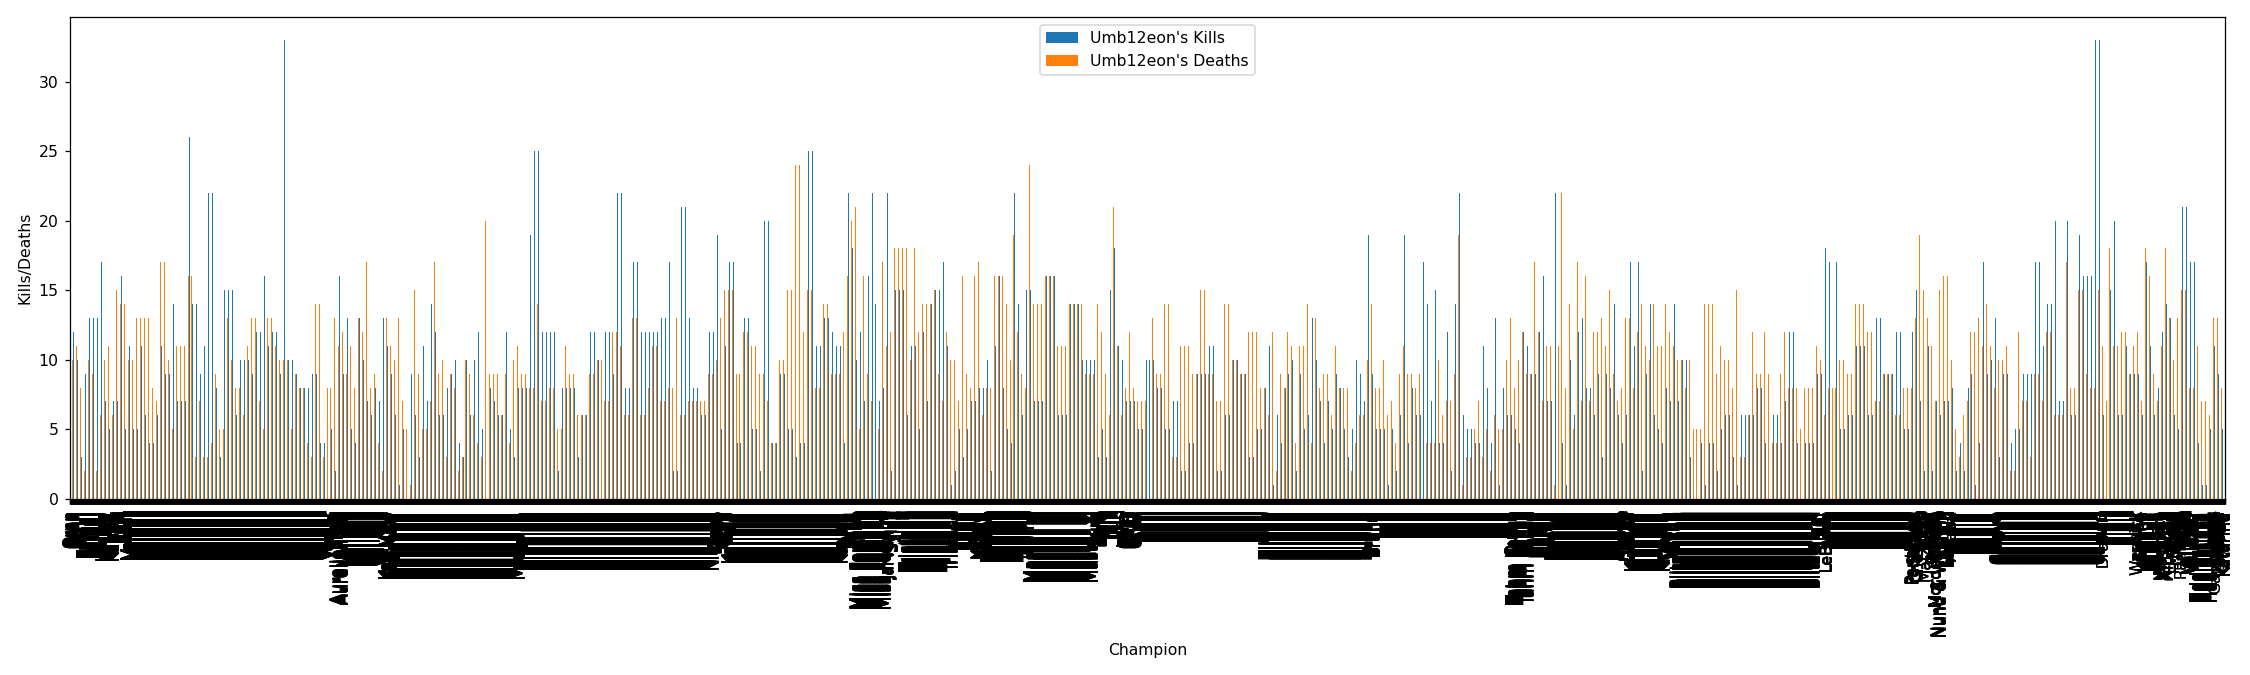

In [43]:
# Bar chart with pandas
champion_kills = dropped_na_df[["Champion","Umb12eon's Kills","Umb12eon's Deaths"]]
champion_kills = champion_kills.set_index("Champion")
champion_kills.plot(kind = "bar", figsize = (20,6))
plt.ylabel("Kills/Deaths")
plt.tight_layout()
plt.savefig("Images/Same_Champion_Comparison.png")

In [26]:
# Bar chart with MPL
# plt.figure(10,6)
# x_axis = np.arange(len(dropped_na_df))
# tick_locations = [value for value in x_axis]
# plt.bar(x_axis, dropped_na_df["Umb12eon's Kills"], alpha = 0.5, align = "center")
# plt.xlabel("Champion")
# plt.ylabel("Number of Kills/Deaths")
# plt.xticks(tick_locations, dropped_na_df["Champion"], rotation = "vertical")
# plt.show()

# fig, ax = plt.subplots()

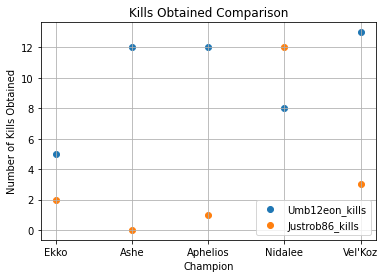

In [34]:
# Scatter plot showing difference in amount of kills obtained
x_axis = ["Ekko", "Ashe", "Aphelios", "Nidalee", "Vel'Koz"]
Umb12eon_kills = [5, 12, 12, 8, 13]
Justrob86_kills = [2, 0, 1, 12, 3]
plt.xlabel("Champion")
plt.ylabel("Number of Kills Obtained")
plt.scatter(x_axis, Umb12eon_kills)
plt.scatter(x_axis, Justrob86_kills)
plt.title("Kills Obtained Comparison")
plt.grid()
plt.legend(["Umb12eon_kills", "Justrob86_kills"], loc = "best")
plt.savefig("Images/Kills_Obtained_Comparison.png")
plt.show()

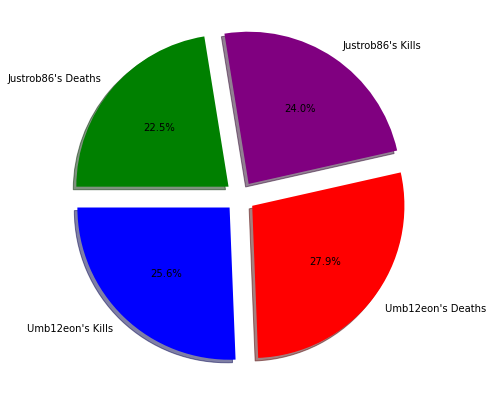

In [33]:
# Pie chart with MPL
labels = ["Umb12eon's Kills", "Umb12eon's Deaths", "Justrob86's Kills", "Justrob86's Deaths"]
sizes = [73304.0, 79800.0, 68722.0, 64230.0]
colors = ["Blue", "Red", "Purple", "Green"]
explode = [0.1,0.1,0.1,0.1]
plt.pie(sizes, explode = explode, labels=labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 180)
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.savefig("Images/Kills_and_deaths.png")
plt.show()